# Capstone Project — The Battle of Neighbourhoods

### Introduction
<p>New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.</p>
 <p>New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.</p> 
    <p>The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies.
    Over last decades it is continuously grow because of the city’s important role in government and commercial business.
    
</p>
With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc.

So as part of this project , we will list and visualise all major parts of New Delhi City .
   </p>

 ### Questions that can be asked using the above mentioned datasets
- What is best location in New Delhi City for Chinese Cuisine ? 
- Which areas have large number of Chinese Resturant Market ? 
- Which all areas have less number of resturant ?
- Which is the best place to stay if I prefer Chinese Cuisine ?
- What places are have best restaurant in New Delhi?

### Data
For this project we need the following data :
<ul>
<li> New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
    <ul>
        <li>Data source : <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
 <li> Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
     </ul>
<li> Nearby places in each locality of new delhi city.
        <ul>
            <li>Data source : <a href="https://developer.foursquare.com/"> Fousquare API </a>
        <li> Description : By using this api we will get all the venues in each neighborhood. 
    

### Approach
- Collect the new delhi city data from <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
- Using FourSquare API we will find all venues for each neighborhood.
- Filter out all venues that are nearby by locality.
- Using aggregative rating for each resturant to find the best places.
- Visualize the Ranking of neighborhoods using folium library(python)

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

/bin/bash: conda: command not found
     |████████████████████████████████| 102kB 5.8MB/s 


## Read the zomato resturant data from csv file

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  ...  Rating text Votes
0        6317637        Le Petit Souffle  ...    Excellent   314
1        6304287        Izakaya Kikufuji  ...    Excellent   591
2        6300002  Heat - Edsa Shangri-La  ...    Very Good   270
3        6318506                    Ooma  ...    Excellent   365
4        6314302             Sambo Kojin  ...    Excellent   229

[5 rows x 21 columns]

In [18]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code  ... Rating color Rating text Votes
0       18287358       Food Cloud             1  ...        White   Not rated     2
1       18216944        Burger.in             1  ...       Orange     Average    46
2         313333  Days of the Raj             1  ...       Orange     Average    45
3       18384127   Dilli Ka Dhaba             1  ...       Orange     Average    11
4            582        Govardhan             1  ...       Orange     Average   238

[5 rows x 21 columns]

## Data Cleaning
#### remove the unwanted columns and rows from dataset

In [0]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [0]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [21]:
df_Res.head()

Restaurant Name Locality  Longitude  ...  Aggregate rating Rating text  Votes
1        Burger.in  Adchini  77.196923  ...               3.2     Average     46
2  Days of the Raj  Adchini  77.197475  ...               3.4     Average     45
3   Dilli Ka Dhaba  Adchini  77.198033  ...               2.6     Average     11
4        Govardhan  Adchini  77.196924  ...               3.4     Average    238
5   Mezbaan Grills  Adchini  77.198122  ...               3.1     Average      8

[5 rows x 8 columns]

### created map to show the restaurant cluters 

In [22]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [23]:
df_Res.head()


Restaurant Name Locality  Longitude  ...  Rating text Votes  Cluster
1        Burger.in  Adchini  77.196923  ...      Average    46        0
2  Days of the Raj  Adchini  77.197475  ...      Average    45        0
3   Dilli Ka Dhaba  Adchini  77.198033  ...      Average    11        0
4        Govardhan  Adchini  77.196924  ...      Average   238        0
5   Mezbaan Grills  Adchini  77.198122  ...      Average     8        0

[5 rows x 9 columns]

## What places are have best restaurant in New Delhi?

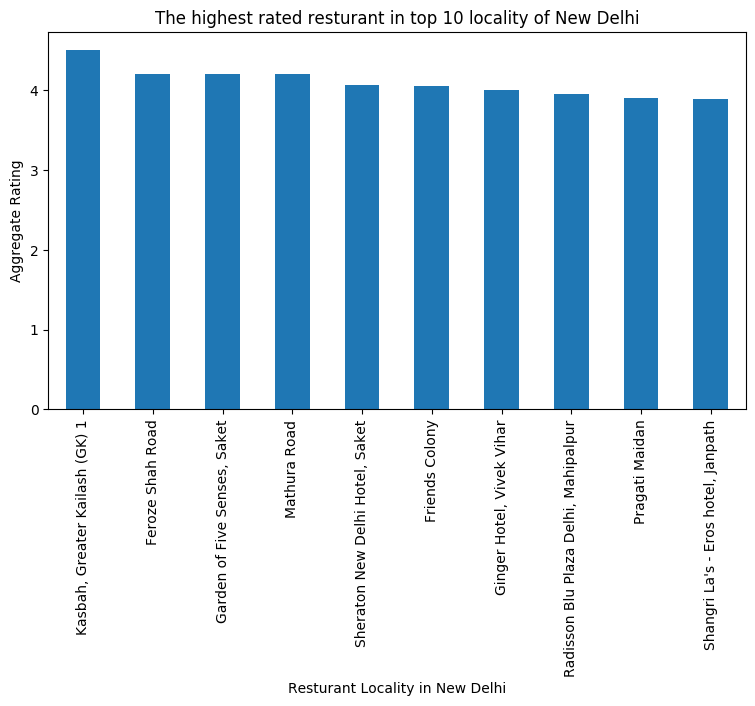

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()


The best restarants are available in <b>Kesbah, Greater Kailash area.</b>

## what places are have worst restaurants in New Delhi?

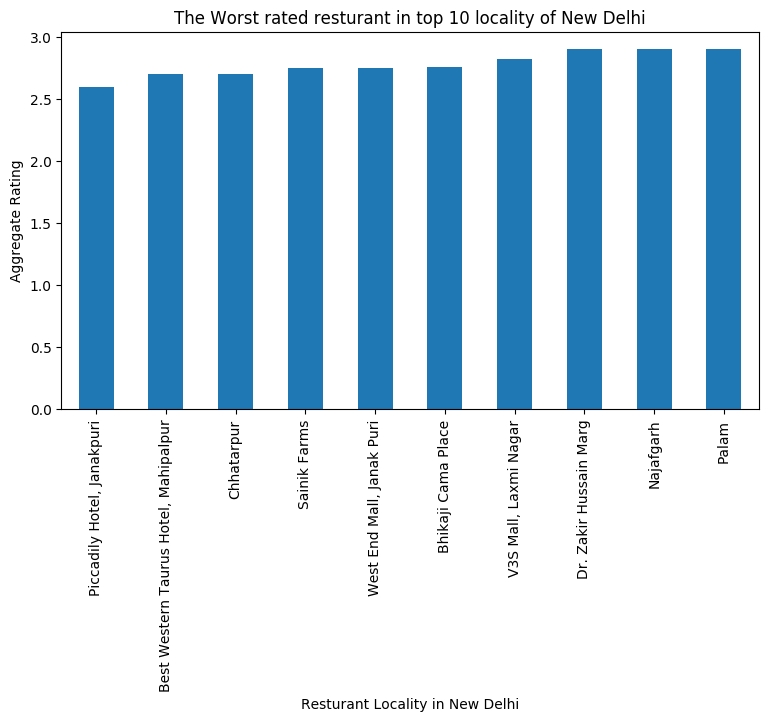

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restarants are available in <b>Piccadily Hotel, Janakpuri.</b>

## Which place are suitable for edible person in New Delhi city?

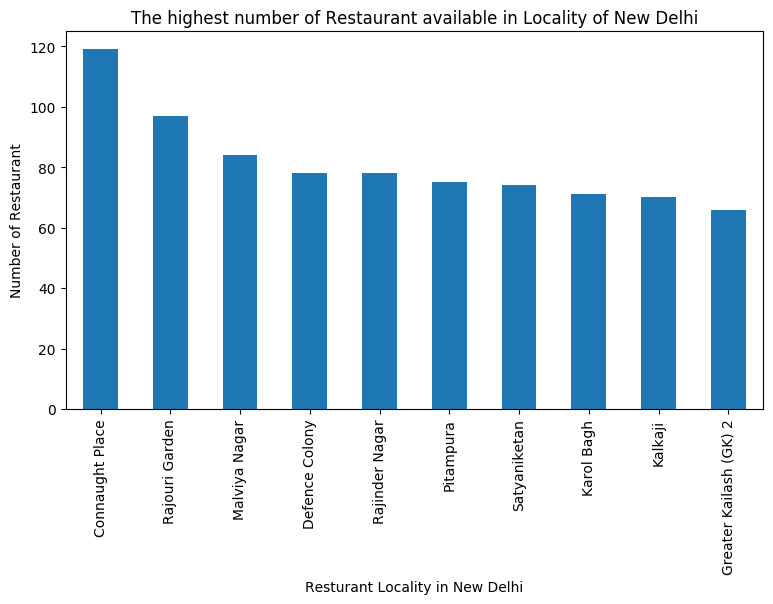

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

<b>Connaught Place</b> is the best places for edible person to stay there.

## Which place are not suitable for edible person in New Delhi city?

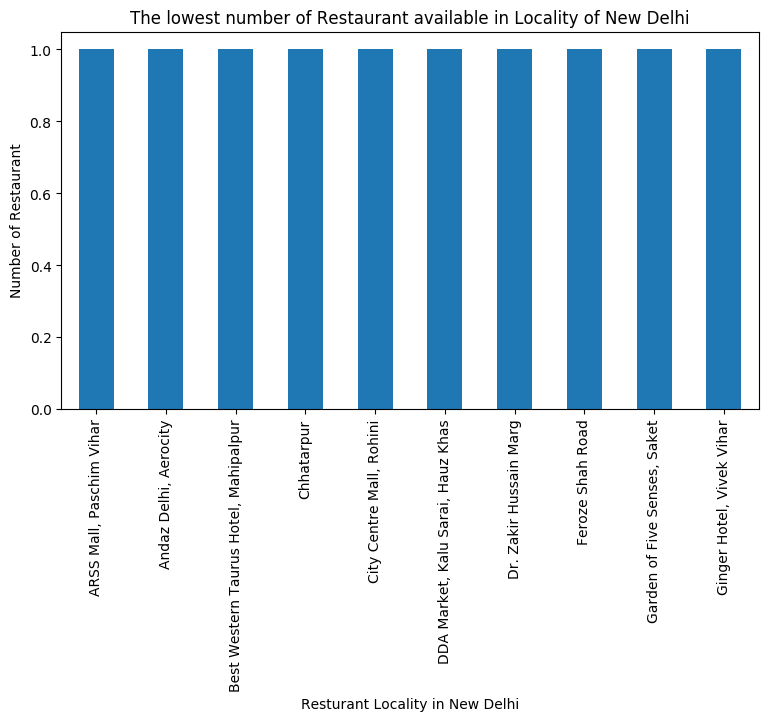

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

## What are the best places for chinese restaurant in New Delhi city

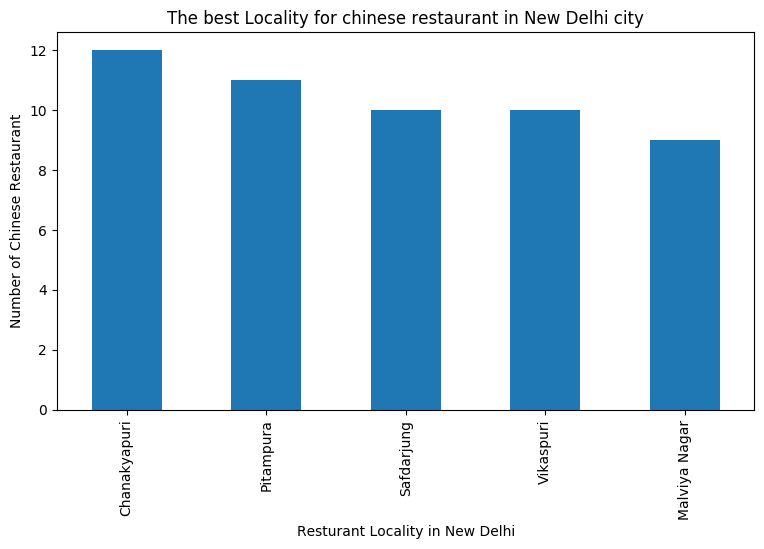

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

<b>Chanakyapuri</b> is the best place for Chinese restaurant.

## which places are the best chinese resturants in New Delhi?  

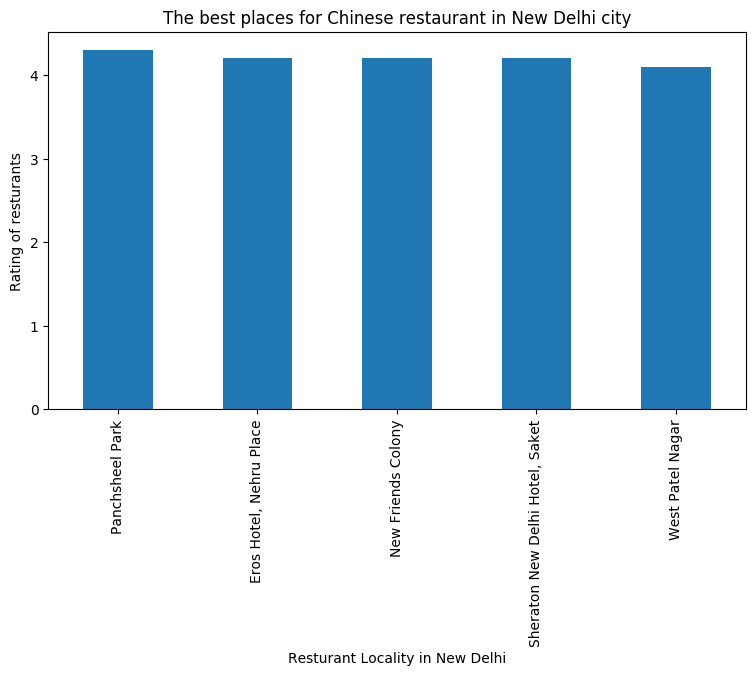

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

<b> Panchsheel park</b> is best Chinese resturants.

### Data transformation
Based on Locality grouping the data

In [0]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [31]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality  ...  No_of_Votes
0       ARSS Mall, Paschim Vihar  ...          117
1                        Adchini  ...         1560
2  Aditya Mega Mall, Karkardooma  ...          434
3                       Aerocity  ...           59
4  Aggarwal City Mall, Pitampura  ...          126

[5 rows x 8 columns]

In [32]:
df_final.shape

(240, 8)

## Define Foursquare Credentials and Version

In [35]:

## Define Foursquare Credentials and Version
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


## create a function to repeat the same process to all the Locality in New Delhi

In [0]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## find the venues in all New Delhi Locality

In [37]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [38]:
new_Delhi_venues.head()

Locality  ...      Venue Category
0  ARSS Mall, Paschim Vihar  ...      Sandwich Place
1  ARSS Mall, Paschim Vihar  ...         Coffee Shop
2  ARSS Mall, Paschim Vihar  ...         Pizza Place
3  ARSS Mall, Paschim Vihar  ...   Indian Restaurant
4  ARSS Mall, Paschim Vihar  ...  Chinese Restaurant

[5 rows x 7 columns]

In [39]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  ...  Venue Category
Locality                                           ...                
ARSS Mall, Paschim Vihar                       10  ...              10
Adchini                                         5  ...               5
Aditya Mega Mall, Karkardooma                  10  ...              10
Aerocity                                        7  ...               7
Aggarwal City Mall, Pitampura                   6  ...               6
...                                           ...  ...             ...
West Gate Mall, Rajouri Garden                 15  ...              15
West Patel Nagar                                5  ...               5
Worldmark 1, Aerocity                          32  ...              32
Yusuf Sarai                                    17  ...              17
ibis New Delhi, Aerocity                       31  ...              31

[240 rows x 6 columns]

In [40]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 208 uniques categories.


In [41]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  ...  Wings Joint  Women's Store
0  ARSS Mall, Paschim Vihar    0  ...            0              0
1  ARSS Mall, Paschim Vihar    0  ...            0              0
2  ARSS Mall, Paschim Vihar    0  ...            0              0
3  ARSS Mall, Paschim Vihar    0  ...            0              0
4  ARSS Mall, Paschim Vihar    0  ...            0              0

[5 rows x 209 columns]

In [42]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  ...  Wings Joint  Women's Store
0          ARSS Mall, Paschim Vihar  0.100000  ...          0.0            0.0
1                           Adchini  0.000000  ...          0.0            0.0
2     Aditya Mega Mall, Karkardooma  0.000000  ...          0.0            0.0
3                          Aerocity  0.000000  ...          0.0            0.0
4     Aggarwal City Mall, Pitampura  0.000000  ...          0.0            0.0
..                              ...       ...  ...          ...            ...
235  West Gate Mall, Rajouri Garden  0.000000  ...          0.0            0.0
236                West Patel Nagar  0.000000  ...          0.0            0.0
237           Worldmark 1, Aerocity  0.000000  ...          0.0            0.0
238                     Yusuf Sarai  0.058824  ...          0.0            0.0
239        ibis New Delhi, Aerocity  0.000000  ...          0.0            0.0

[240 rows x 209 columns]

In [43]:
New_Delhi_grouped.shape

(240, 209)

In [44]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
               venue  freq
0  Indian Restaurant   0.2
1                ATM   0.1
2             Market   0.1
3        Pizza Place   0.1
4        Coffee Shop   0.1


----Adchini----
               venue  freq
0                Pub   0.4
1               Café   0.4
2  Indian Restaurant   0.2
3                ATM   0.0
4       Nutritionist   0.0


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1  Indian Restaurant   0.2
2      Shopping Mall   0.2
3          Multiplex   0.2
4               Café   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1        Airport Lounge  0.14
2  Fast Food Restaurant  0.14
3      Airport Terminal  0.14
4   Rental Car Location  0.14


----Aggarwal City Mall, Pitampura----
               venue  freq
0  Indian Restaurant  0.50
1               Food  0.17
2   Department Store  0.17
3        Pizza Place  0.17
4                ATM  0.00


----Aggarwal City Pl

In [0]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [46]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality  ...     10th Most Common Venue
0          ARSS Mall, Paschim Vihar  ...           Airport Terminal
1                           Adchini  ...                 Food Truck
2     Aditya Mega Mall, Karkardooma  ...  Indian Chinese Restaurant
3                          Aerocity  ...        Fried Chicken Joint
4     Aggarwal City Mall, Pitampura  ...                 Food Truck
..                              ...  ...                        ...
235  West Gate Mall, Rajouri Garden  ...                Snack Place
236                West Patel Nagar  ...          French Restaurant
237           Worldmark 1, Aerocity  ...              Metro Station
238                     Yusuf Sarai  ...             Ice Cream Shop
239        ibis New Delhi, Aerocity  ...           Department Store

[240 rows x 11 columns]

In [49]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(240,)

In [51]:
# add clustering labels
New_Delhi_merged = df_final.head(240)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Locality  ...     10th Most Common Venue
0       ARSS Mall, Paschim Vihar  ...           Airport Terminal
1                        Adchini  ...                 Food Truck
2  Aditya Mega Mall, Karkardooma  ...  Indian Chinese Restaurant
3                       Aerocity  ...        Fried Chicken Joint
4  Aggarwal City Mall, Pitampura  ...                 Food Truck

[5 rows x 19 columns]

In [52]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [53]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating  ...   9th Most Common Venue  10th Most Common Venue
1    28.537063    3.292308  ...       French Restaurant              Food Truck
6    28.527088    3.117391  ...       French Restaurant              Food Truck
7    28.541298    3.425000  ...       Indian Restaurant            Burger Joint
8    28.555599    3.800000  ...           Metro Station             Flea Market
9    28.659870    3.281481  ...     Fried Chicken Joint       French Restaurant
..         ...         ...  ...                     ...                     ...
230  28.658041    3.400000  ...     Fried Chicken Joint       French Restaurant
232  28.667344    3.077273  ...  Furniture / Home Store      Frozen Yogurt Shop
233  28.695096    3.050000  ...       French Restaurant              Food Truck
234  28.630044    2.750000  ...    Fast Food Restaurant           Metro Station
238  28.559928    3.075000  ...          Breakfast Spot          Ice Cream Shop

[135 rows x 15 columns]

In [54]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating  ... 9th Most Common Venue  10th Most Common Venue
15   28.691136    3.390909  ...     French Restaurant              Food Truck
22   28.654105    3.085714  ...            Food Truck              Food Court
33   28.657388    3.320000  ...     French Restaurant              Food Truck
57   28.699837    3.376471  ...     French Restaurant              Food Court
61   28.668181    3.400000  ...   Fried Chicken Joint       French Restaurant
98   28.651527    3.490909  ...   Fried Chicken Joint       French Restaurant
103  28.652501    3.080000  ...   Fried Chicken Joint       French Restaurant
104  28.656263    3.097619  ...     French Restaurant              Food Truck
126  28.602860    2.973214  ...     French Restaurant              Food Truck
160  28.712975    3.066667  ...   Fried Chicken Joint       French Restaurant

[10 rows x 15 columns]

In [55]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating  ...      9th Most Common Venue  10th Most Common Venue
0    28.668945    3.100000  ...          Accessories Store        Airport Terminal
4    28.690020    3.033333  ...          French Restaurant              Food Truck
13   28.690182    3.090000  ...         Frozen Yogurt Shop     Fried Chicken Joint
23   28.656414    3.358182  ...                 Food Court                    Food
24   28.649658    3.800000  ...         Frozen Yogurt Shop     Fried Chicken Joint
42   28.576161    2.983333  ...                  Gastropub                  Garden
43   28.643320    3.287500  ...             Ice Cream Shop       French Restaurant
46   28.573241    3.225000  ...          French Restaurant              Food Truck
47   28.681582    3.046875  ...          French Restaurant              Food Truck
49   28.602169    2.900000  ...          Electronics Store      English Restaurant
55   28.617102    4.200000  ...                 Food Truck              Food Court
66   28.699373    3.252174  ...                 Food Truck              Food Court
71   28.641003    3.650000  ...  Indian Chinese Restaurant     Fried Chicken Joint
76   28.576785    3.200000  ...     Furniture / Home Store      Frozen Yogurt Shop
77   28.631728    3.060714  ...              Hot Dog Joint       Fish & Chips Shop
80   28.611614    3.366667  ...        Fried Chicken Joint       French Restaurant
84   28.630942    3.122000  ...         Frozen Yogurt Shop       French Restaurant
85   28.648885    3.561111  ...        Fried Chicken Joint       French Restaurant
92   28.584294    3.100000  ...         Frozen Yogurt Shop     Fried Chicken Joint
97   28.662972    3.533333  ...         Frozen Yogurt Shop       French Restaurant
99   28.648795    3.238028  ...               Dessert Shop                  Bakery
113  28.541242    2.984615  ...        Fried Chicken Joint       French Restaurant
116  28.486576    2.950000  ...          French Restaurant              Food Truck
118  28.646549    3.200000  ...                 Food Truck              Food Court
124  28.521760    4.200000  ...          French Restaurant              Food Truck
133  28.708185    3.344444  ...                 Food Truck              Food Court
138  28.556145    3.040909  ...              Hot Dog Joint    Fast Food Restaurant
140  28.627959    3.004167  ...          French Restaurant              Food Truck
144  28.591092    3.200000  ...              Hot Dog Joint  Furniture / Home Store
153  28.608055    3.860000  ...                 Smoke Shop             Art Gallery
156  28.630734    3.185714  ...          Fish & Chips Shop          Ice Cream Shop
158  28.700027    3.157333  ...        Fried Chicken Joint       French Restaurant
165  28.539464    2.900000  ...         Frozen Yogurt Shop     Fried Chicken Joint
199  28.601779    3.700000  ...          Convenience Store              Donut Shop
204  28.597038    3.533333  ...                       Café             Bus Station
209  28.631362    3.537500  ...     Furniture / Home Store      Frozen Yogurt Shop
211  28.579556    3.780000  ...        Japanese Restaurant                   Hotel
223  28.619954    2.905714  ...                 Food Truck              Food Court
228  28.596073    3.052941  ...                 Food Truck              Food Court
236  28.648177    3.675000  ...        Fried Chicken Joint       French Restaurant

[40 rows x 15 columns]

In [56]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  ...          10th Most Common Venue
3    28.553077  ...             Fried Chicken Joint
10   28.554807  ...  Multicuisine Indian Restaurant
12   28.641698  ...             Fried Chicken Joint
19   28.548827  ...              Frozen Yogurt Shop
25   28.495624  ...               French Restaurant
35   28.590297  ...                Airport Terminal
56   28.570246  ...               French Restaurant
60   28.665829  ...             Fried Chicken Joint
69   28.550327  ...                   Metro Station
70   28.590654  ...                          Arcade
72   28.705700  ...               French Restaurant
83   28.552895  ...                Department Store
111  28.618772  ...                             Bar
112  28.552036  ...                Department Store
119  28.545033  ...               Accessories Store
128  28.608252  ...                      Food Court
146  28.535040  ...                      Food Truck
149  28.642910  ...                     Snack Place
162  28.725814  ...                      Food Truck
163  28.552711  ...                            Café
168  28.543814  ...             Fried Chicken Joint
169  28.667261  ...             Fried Chicken Joint
174  28.550802  ...                Department Store
197  28.592724  ...               Indian Restaurant
205  28.600171  ...                           Diner
217  28.535183  ...                      Food Truck
237  28.550257  ...                   Metro Station
239  28.551398  ...                Department Store

[28 rows x 15 columns]

In [57]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating  ...   9th Most Common Venue     10th Most Common Venue
2    28.656131    3.275000  ...     Fried Chicken Joint  Indian Chinese Restaurant
5    28.700516    3.040000  ...     Fried Chicken Joint          French Restaurant
11   28.562580    3.750000  ...  Furniture / Home Store         Frozen Yogurt Shop
27   28.716874    3.400000  ...      Frozen Yogurt Shop        Fried Chicken Joint
28   28.650254    3.166667  ...    Gym / Fitness Center              Shopping Mall
32   28.718351    3.150000  ...     Fried Chicken Joint          French Restaurant
34   28.720602    3.600000  ...     Fried Chicken Joint                Fish Market
36   28.692546    3.480000  ...     Arts & Crafts Store             Ice Cream Shop
38   28.702961    3.225000  ...     Fried Chicken Joint          French Restaurant
82   28.548371    3.137500  ...     Fried Chicken Joint          French Restaurant
94   28.538153    3.117143  ...       Fish & Chips Shop        Fried Chicken Joint
101  28.667644    3.300000  ...      Frozen Yogurt Shop        Fried Chicken Joint
105  28.526489    3.300000  ...       French Restaurant                 Food Truck
110  28.635391    3.040385  ...       Food & Drink Shop     Furniture / Home Store
130  28.724100    3.133333  ...     Fried Chicken Joint          French Restaurant
134  28.656939    3.234783  ...                    Café                       Food
142  28.693270    3.519149  ...     Arts & Crafts Store             Ice Cream Shop
148  28.642402    3.195652  ...                    Café             Clothing Store
170  28.643757    3.575000  ...              Food Court                       Food
173  28.714176    3.352083  ...       French Restaurant                 Food Truck
181  28.571849    3.316667  ...       French Restaurant                 Food Truck
187  28.629634    2.942857  ...      Frozen Yogurt Shop        Fried Chicken Joint
201  28.651299    3.500000  ...     American Restaurant                 Hookah Bar
210  28.661133    3.775000  ...       French Restaurant                 Food Truck
219  28.638846    3.048148  ...     Fried Chicken Joint          French Restaurant
231  28.637492    3.062264  ...     Fried Chicken Joint          French Restaurant
235  28.652978    3.500000  ...               Multiplex                Snack Place

[27 rows x 15 columns]

### Conclusion 
- Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine. 
- Pancsheel park, Nehru place have the best Chinese Resturant. 
- Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
- Greater kailash, Feroze shah road, Saket have best resturants in New Delhi.
#### Cluster 1:
 It is most recommended for Indian Restaurants.
#### Cluster 2:
 It is most recommended for Hotels and nightclub.
#### Cluster 3 and Cluster 5:
 It is most recommended for Fast food.
#### Cluster 4:
 It is most recommended for the cafe and pizza.
    